<a href="https://colab.research.google.com/github/codekennML/ExploratoryDataAnalysis/blob/main/Exploring_the_2022_PL_Season.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt



In [22]:
pd.set_option('display.max_columns', None)

In [160]:
plt.rcParams["figure.figsize"] = [10, 5]

In [125]:
df =  pd.read_csv('/content/matches.csv')
df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,1.9,1.3,64.0,58262.0,Fernandinho,4-3-3,Anthony Taylor,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,2.7,0.1,67.0,51437.0,İlkay Gündoğan,4-3-3,Graham Scott,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,3.8,0.1,80.0,52276.0,İlkay Gündoğan,4-3-3,Martin Atkinson,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,2.9,0.8,61.0,32087.0,İlkay Gündoğan,4-3-3,Paul Tierney,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,1.1,0.4,63.0,52698.0,Fernandinho,4-3-3,Jonathan Moss,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [126]:
df.shape

(1389, 28)

In [26]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

In [132]:
filt = df.loc[df['season'] == 2021]
df.drop(filt.index, inplace = True)



In [133]:
df.shape

(629, 28)

In [134]:
df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,1.9,1.3,64.0,58262.0,Fernandinho,4-3-3,Anthony Taylor,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,2.7,0.1,67.0,51437.0,İlkay Gündoğan,4-3-3,Graham Scott,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,3.8,0.1,80.0,52276.0,İlkay Gündoğan,4-3-3,Martin Atkinson,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,2.9,0.8,61.0,32087.0,İlkay Gündoğan,4-3-3,Paul Tierney,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,1.1,0.4,63.0,52698.0,Fernandinho,4-3-3,Jonathan Moss,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


<AxesSubplot:xlabel='team'>

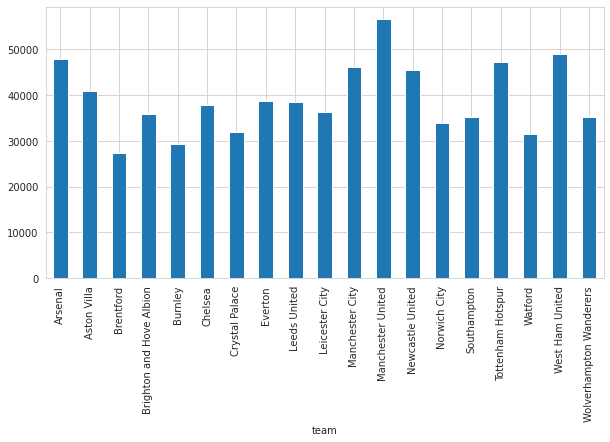

In [168]:
df.groupby(['team'])['attendance'].mean().plot.bar()


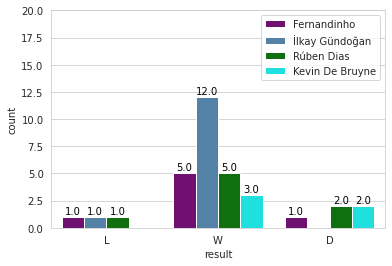

In [161]:
import seaborn as sns
filt =  df.loc[df['team'] == 'Manchester City']
fig, ax = plt.subplots(figsize=(6, 4))  
p = sns.countplot(x = filt.result, data = filt,hue = filt.captain, palette=['purple', 'steelblue','green','cyan'] )
ax.set_ylim(0,20)
plt.legend(loc = 'upper right')
for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1),  ha='center', va='bottom',
                    color= 'black')



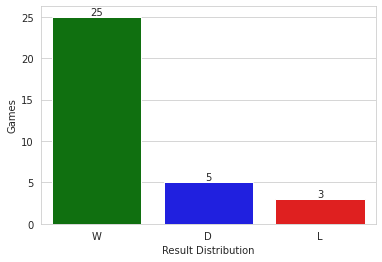

In [163]:
filt = df.groupby(['team'])['result'].value_counts()
res = filt["Manchester City"]
sns.set_style('whitegrid')
with sns.color_palette('gnuplot2_r', n_colors = 3):
  fig, ax =  plt.subplots(figsize=(6,4))
  g = sns.barplot(x=res.index, y = res.values, capsize=0.2, ax=ax , palette=['green', 'blue','red'])
  plt.bar_label(g.containers[0], label_type='edge')
  plt.xlabel('Result Distribution')
  plt.ylabel('Games')
  plt.show()

<AxesSubplot:xlabel='team'>

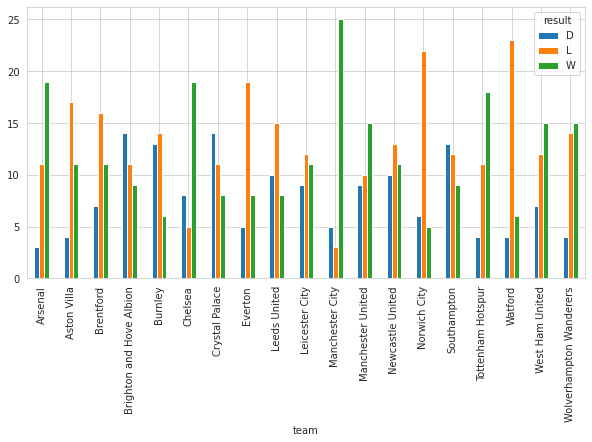

In [162]:

df.groupby(["team","result"]).size ().unstack().plot.bar()

